In [13]:
const dataURL = "https://raw.githubusercontent.com/vega/vega/main/docs/data/movies.json"

const body = await fetch(dataURL);
const data = await body.json()
data[0]

{
  Title: "The Land Girls",
  "US Gross": 146083,
  "Worldwide Gross": 146083,
  "US DVD Sales": null,
  "Production Budget": 8000000,
  "Release Date": "Jun 12 1998",
  "MPAA Rating": "R",
  "Running Time min": null,
  Distributor: "Gramercy",
  Source: null,
  "Major Genre": null,
  "Creative Type": null,
  Director: null,
  "Rotten Tomatoes Rating": null,
  "IMDB Rating": 6.1,
  "IMDB Votes": 1071
}

In [25]:
import vl from 'npm:vega-lite-api';

const mark = vl.markBar().data(data).encode(
  vl.x().fieldQ('IMDB Rating').bin(true),
  vl.y().count()
)

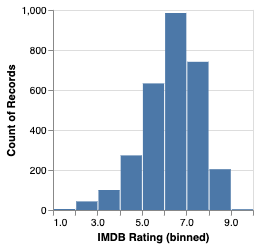

In [26]:
import { display } from "https://deno.land/x/display/mod.ts"
display({
    'application/vnd.vegalite.v5+json': mark.toSpec()
})

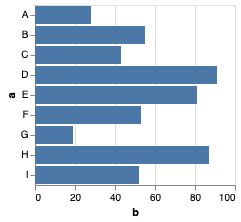

In [31]:
let spec = vl.markBar({ tooltip: true })
    .data([
      { a: "A", b: 28 }, { a: "B", b: 55 }, { a: "C", b: 43 },
      { a: "D", b: 91 }, { a: "E", b: 81 }, { a: "F", b: 53 },
      { a: "G", b: 19 }, { a: "H", b: 87 }, { a: "I", b: 52 },
    ])
    .encode(
      vl.x().fieldQ("b"),
      vl.y().fieldN("a"),
      vl.tooltip([vl.fieldQ("b"), vl.fieldN("a")])
    ).toSpec()

display({
    'application/vnd.vegalite.v5+json': spec
})

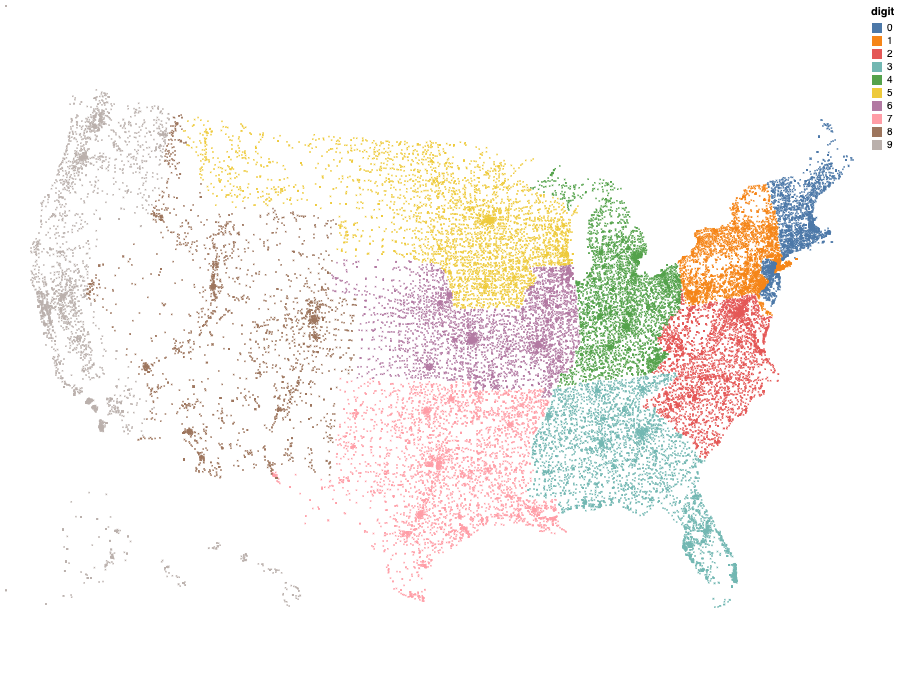

In [45]:
let plot = vl.markSquare({size: 2, opacity: 1})
  .data('https://raw.githubusercontent.com/vega/vega-datasets/main/data/zipcodes.csv')
  .transform(vl.calculate('substring(datum.zip_code, 0, 1)').as('digit'))
  .project(vl.projection('albersUsa'))
  .encode(vl.longitude().fieldQ('longitude'), vl.latitude().fieldQ('latitude'), vl.color().fieldN('digit'))
  .width(900)
  .height(Math.floor(1200 / 1.75))
  .autosize({type: 'fit-x', contains: 'padding'})
  .config({view: {stroke: null}})

display({ 'application/vnd.vegalite.v5+json': plot.toSpec() })